# Ejercicio 8 - HDR
Se investiga y aplica la técnica de High Dinamic Range (HDR) a un set de imágenes. Este método consiste en tomar muchas fotos con distinto tiempo de exposición, obteniendo imágenes que capturan distintas partes de la escena que tienen más o menos luz. Luego se combina su información para obtener una imagen que busca tener todas las partes con el rango dinámico acotado de una imagen de 24 bits.

[Tutorial de OpenCV](https://learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/)

In [24]:
import cv2 as cv

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### Cargamos las imágenes

In [4]:
filename = "../resources/HDR images/office_1.jpg"
N = 6
imgs = []
for k in range(N):
    img = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)
    imgs.append(img)
    filename = filename.replace(f'{k + 1}',f'{k + 2}')
exp_times = np.array([0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000], dtype=np.float32)

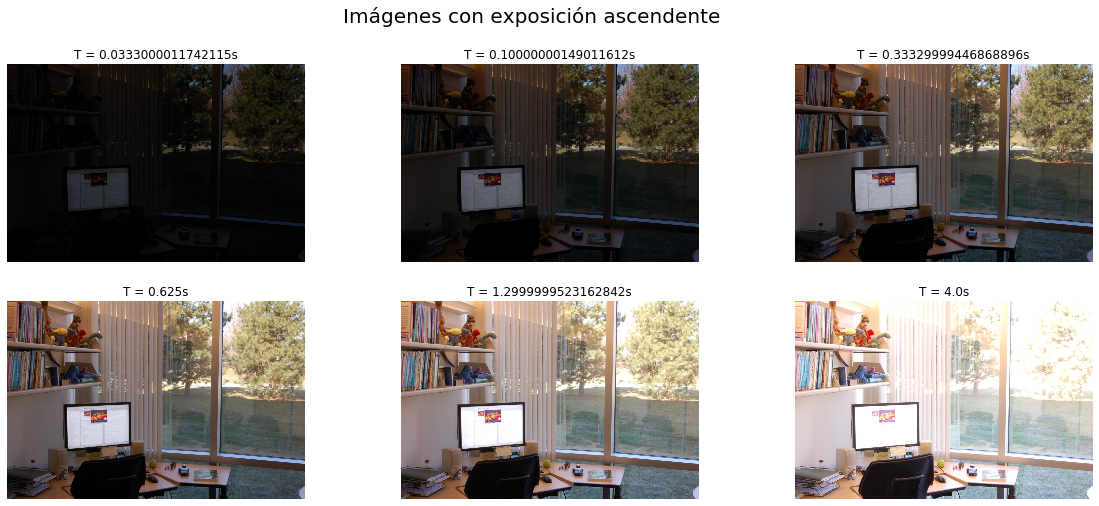

In [5]:
# Mostramos todas las imagenes
plt.figure(figsize=(20,8))
plt.suptitle('Imágenes con exposición ascendente', fontsize=20)
for k in range(N):
    ax = plt.subplot(2, 3, k+1)
    ax.imshow(imgs[k])
    ax.axis('off')
    ax.set_title(f'T = {exp_times[k]}s')
plt.show()

## Algoritmo de HDR

In [6]:
# Salteamos el alineamiento porque las imágenes están alineadas

## Estimamos CRF (Camera Response Function)
En una cámara, la relación entre el tiempo de exposición y la intensidad no es lineal, por lo que debemos estimar la Camera Response Function (CRF), para poder relacionar correctamente los tiempos de exposición a intensidades de color del mundo real. Para ello se utiliza el método de Debevec, el cual está implementado en OpenCV.

In [7]:
calibration = cv.createCalibrateDebevec()
crf = calibration.process(imgs, exp_times)

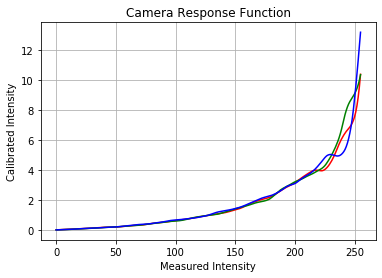

In [8]:
plt.title('Camera Response Function')
plt.plot(crf[:,:,0], color='r')
plt.plot(crf[:,:,1], color='g')
plt.plot(crf[:,:,2], color='b')
plt.ylabel('Calibrated Intensity')
plt.xlabel('Measured Intensity')
plt.grid()
plt.show()

## Mergeamos las imágenes
Ahora utilizando el conocimiento del CRF y los tiempos de exposición podemos realizar la calibración. Juntamos todas las imágenes calibradas en una sola sumándolas. El resultado estará fuera de rango, lo cual se solucionará en los siguientes pasos.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


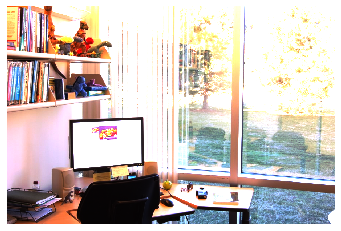

In [9]:
merge = cv.createMergeDebevec()
hdr = merge.process(imgs, exp_times, crf)
plt.imshow(hdr)
plt.axis('off')
plt.show()

## Tone Mapping

### Drago Tonemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


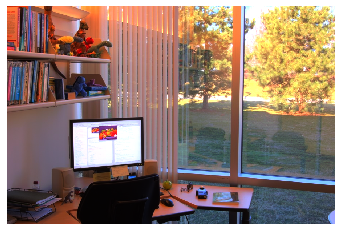

In [20]:
tonemapDrago = cv.createTonemapDrago(gamma=1.0, saturation=1.0, bias=0.85)
ldrDrago = tonemapDrago.process(hdr)
ldrDrago = 3*ldrDrago
plt.imshow(ldrDrago)
plt.axis('off')
plt.show()

### Tonemap Reinhard
Se ajustan los parámetros de intensidad, adaptación a la luz y al color.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


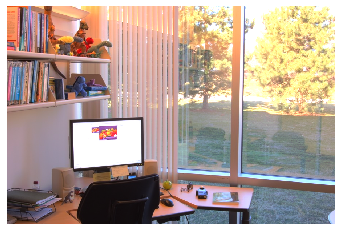

In [34]:
tonemapReinhard = cv.createTonemapReinhard(1.5, -8, 0.7,0)
ldrReinhard = tonemapReinhard.process(hdr)
ldrReinhard = 3 * ldrReinhard
plt.imshow(ldrReinhard)
plt.axis('off')
plt.show()